In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [367]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [368]:
df.shape

(200, 5)

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [370]:
#droppping the unwanted columns
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [371]:
#checking overall healt of data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [372]:
#checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

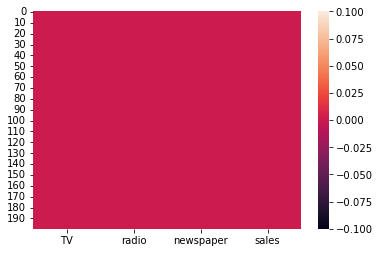

In [239]:
sns.heatmap(df.isnull())

no null values is present

# checking data distribution

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

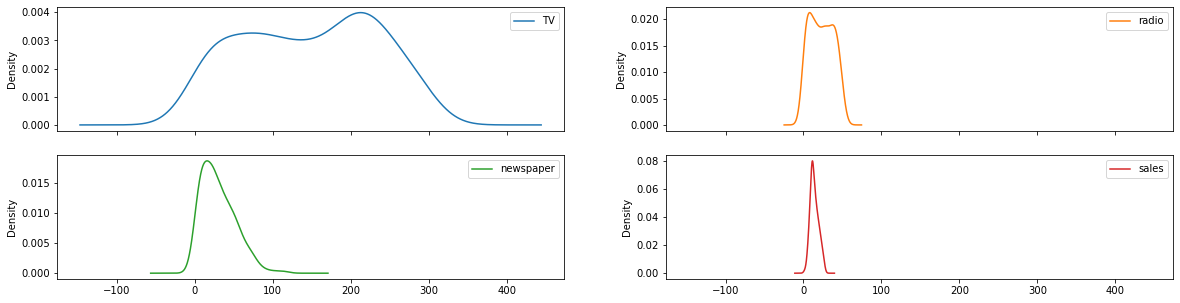

In [374]:
df.plot(kind='density',subplots=True,layout=(2,2),figsize=(20,5))

it shows data is not nprmally distributed

some outliers and skewness is present in th data

# checking outliers by boxplot

C:\Users\Sawardekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sawardekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sawardekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sawarde

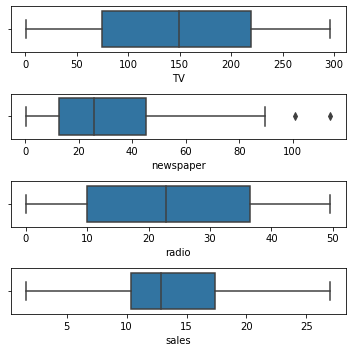

In [375]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt3 = sns.boxplot(df['sales'], ax = axs[3])
plt.tight_layout()

there is some outliers present in the columns

# checking data analysis

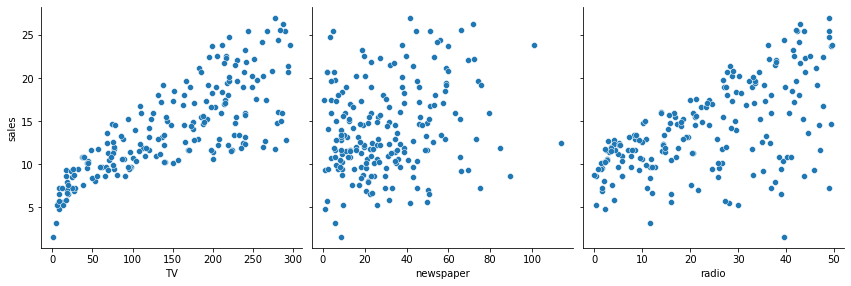

In [376]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

# correlation

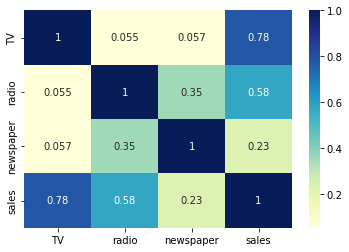

In [377]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

# removing outleris by zscore method

In [378]:
from scipy.stats import zscore

In [379]:
z=np.abs(zscore(df))
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [380]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [381]:
df_new=df[(z<3).all(axis=1)]

In [382]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [383]:
df_new.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


# checking the relationship by usning the scatter plot

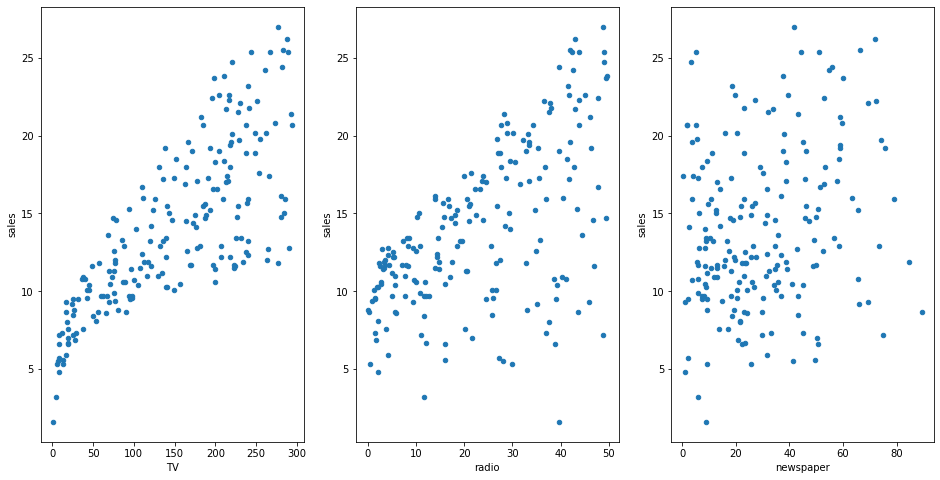

In [384]:
fig,axs=plt.subplots(1,3)
df_new.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df_new.plot(kind='scatter',x='radio',y='sales',ax=axs[1],figsize=(16,8))
df_new.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2],figsize=(16,8))
fig.savefig('testdata.jpg')

in thi graph we clearly see as an when if i invest in TV and radio  automatically my sales are increasing.
it shows positive relation between TV and sales and radio and sales
but newspaper not contributing for sales

# creating feature and label

In [305]:
from sklearn.linear_model import LinearRegression

In [306]:
lm=LinearRegression()

In [307]:
X = df_new[['TV','radio','newspaper']]
y = df_new['sales']

In [308]:
lm.fit(X,y)

LinearRegression()

In [309]:
print('intercept',lm.intercept_)
print('TV',lm.coef_[0])
print('radio',lm.coef_[1])
print('NP',lm.coef_[2])

intercept 2.952308567118184
TV 0.045690341924578895
radio 0.18855046885810486
NP -0.0011776635581814215


In [310]:
import statsmodels.formula.api as smf

In [311]:
#take a test and use the ordinary least squre method
lm=smf.ols( 'sales ~ TV + radio + newspaper',data=df_new).fit()

In [312]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           8.35e-95
Time:                        13:02:07   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
radio          0.1886      0.009     21.772      0.000       0.171       0.206
newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

so we conclude that by doing there evidneces NP is not good investment so im not going to invest in NP 

In [313]:
lm=smf.ols( 'sales ~ TV + radio + newspaper',data=df_new).fit()
lm.rsquared

0.8953917183024751

checking one more time with newspaper our accuracy is 89.5%

In [314]:
lm=smf.ols( 'sales ~ TV + radio ',data=df_new).fit()
lm.rsquared

0.8953728420315047

checking without newspaper our accuracy was same so its clear that there is no profit by investing in newspaper

# Train-Test Split


In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [316]:
# Let's now take a look at the train dataset

X_train.head()

,TV,radio,newspaper
75,16.9,43.7,89.4
3,151.5,41.3,58.5
185,205.0,45.1,19.6
27,240.1,16.7,22.9
91,28.6,1.5,33.0


In [279]:
y_train.head()

75      8.7
3      18.5
185    22.6
27     15.9
91      7.3
Name: sales, dtype: float64

In [327]:
y_pred=lm.predict(X_test)
y_pred

128    22.206688
106     6.141422
100    13.899377
93     21.254638
113    16.378925
167    13.355940
118    15.610528
97     15.325792
53     19.958123
70     17.779190
135    13.973509
126    10.600679
190    12.462361
154    15.477067
127     6.595121
196     8.155821
194    16.462491
177    12.172782
163    17.318484
32      7.653693
11     17.251073
74     17.304482
15     20.824832
42     21.550903
98     24.117428
130    10.407936
172     7.605470
83     14.421725
193    18.446791
125     9.133196
84     20.768103
66      8.995042
151    10.038054
162    14.940500
170     7.396251
78      8.799116
33     18.824286
173    11.958961
155     5.299477
86     11.586744
168    17.207853
114    15.301784
159    12.406764
181    13.928011
7      12.107019
47     21.692103
76      4.488501
29      9.164452
30     21.631721
195     5.372074
41     17.296010
153    18.219976
117     6.571926
65      7.831816
60      5.751413
1      12.352382
138     9.764767
136    11.432606
152    16.3383

In [328]:
lm.rsquared

0.8953728420315047

In [329]:
lm_rsquared=r2_score(y_test,y_pred)

In [330]:
lm_rsquared

0.88110130697775

C:\Users\Sawardekar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


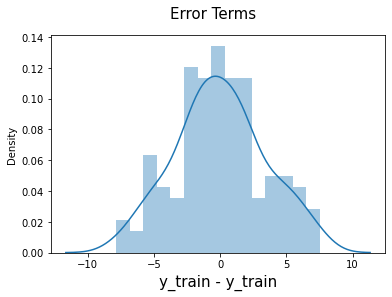

In [319]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train', fontsize = 15)         # X-label
plt.show()


The residuals are following the normally distributed with a mean 0. All good!

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data